# Q1 Kmeans

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler


df=pd.read_csv("compounds.csv")
df.head()

,A,B,C,D,type
0,6.4,2.9,4.3,1.3,amide
1,5.7,4.4,1.5,0.4,phenol
2,6.7,3.0,5.2,2.3,ether
3,5.8,2.8,5.1,2.4,ether
4,6.4,3.2,5.3,2.3,ether


In [2]:
data = np.zeros((len(df),4))
X=df.drop(["type"],axis=1).values
for i in range(0,len(data[0,:])):
    data[:,i] = np.true_divide(X[:,i],np.max(X[:,i]))
    df.iloc[:,i] = np.true_divide(df.iloc[:,i],np.max(df.iloc[:,i]))
df.head()

,A,B,C,D,type
0,0.810127,0.659091,0.623188,0.52,amide
1,0.721519,1.000000,0.217391,0.16,phenol
2,0.848101,0.681818,0.753623,0.92,ether
3,0.734177,0.636364,0.739130,0.96,ether
4,0.810127,0.727273,0.768116,0.92,ether


[[ 1.         -0.10936925  0.87175416  0.81795363]
 [-0.10936925  1.         -0.4205161  -0.35654409]
 [ 0.87175416 -0.4205161   1.          0.9627571 ]
 [ 0.81795363 -0.35654409  0.9627571   1.        ]]


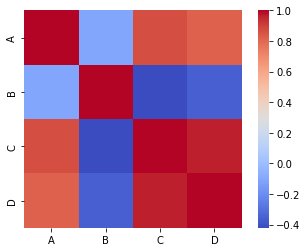

In [3]:
sc=StandardScaler()
X=df.drop(["type"],axis=1)
Z=sc.fit_transform(X)
P=Z.T.dot(Z)/X.shape[0]
print(P)
hm=sns.heatmap(P,cbar=True,cmap='coolwarm',square=True,yticklabels=X.columns, xticklabels=X.columns)

# Q1a) The correlation plot passes the sanity check, the diagonal elements are all 1. It seems like features C and D are highly correlated, same holds for A and D as well and A and C as well. B and C are the most anticoorelated. A and B are almost uncorrelated.

In [4]:
import warnings

class KMeans():
    def __init__(self, K, maximum_iters=500):
        # K: number of clusters to be created
        # distance matrix is Eucledian distance
        self.K = K
        self.maximum_iters = maximum_iters
    
    def cluster(self, input_points):
        """ Do KMeans clustering
        input_points: np.array shape(ndata,nfeatures). 
            Each feature is assumed to be normalized within range of [0,1]
        """
        centroids = np.random.random((self.K, input_points.shape[1]))
        assignments = np.zeros(input_points.shape[0])
        new_assignments = self.create_new_assignments(centroids, input_points)
        # restart if run into bad initialization
        # Comment out this part for Q1.(d)
        if len(np.unique(new_assignments))< self.K:
            return self.cluster(input_points)
            
        n_iters = 1
        while (new_assignments != assignments).any() and n_iters < self.maximum_iters:
            ### Compute the centroid given new assignment ###
            for i in range(0,self.K):
                points = input_points[np.argwhere(new_assignments==i)]
                centroids[i] = np.mean(points, axis=0)
            assignments = new_assignments
            ### Update the assignment with current centroids ###
            new_assignments = self.create_new_assignments(centroids, input_points)
            if len(np.unique(new_assignments))< self.K:
                warnings.warn('At least one centroid vanishes')
            n_iters += 1
            if n_iters == self.maximum_iters:
                print("Warning: Maximum number of iterations reached!")
                
        return new_assignments
            
        
    def create_new_assignments(self, centroids, data_points):
        """ Assign each datapoint to its nearest centroid.
        centroid: 2d array of the current centroid for each cluster
        data_points: 2d arrays recording the features of each data point.
        """
        ###Compute the distances that stores the Eucledian distances between each datapoints and the centroid ###
        #shape (ndata,ncentroid)
        distances = np.zeros((data_points.shape[0],self.K))
        for j in range(0,self.K):
            for i in range(0,data_points.shape[0]):
                distances[i,j] = np.linalg.norm(data_points[i,:] - centroids[j])
        new_assignments = np.argmin(distances, axis=-1)
        return new_assignments
        

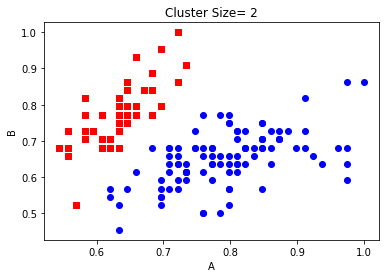

In [5]:
model2 = KMeans(2)
X = df.drop(["type"],axis=1).values
result2 = model2.cluster(X)

# We have chosen A and B as two features because they have almost zero correlation coefficient
A = X[:,0]
B= X[:,1]
feat = ["A","B"]

plt.figure()
i1 = np.argwhere(result2==0)
i2 = np.argwhere(result2==1)

plt.scatter(A[i1],B[i1],c="b",marker = "o" )
plt.scatter(A[i2],B[i2],c="r",marker = "s" )
plt.title("Cluster Size= " + str(2))
plt.xlabel(feat[0])
plt.ylabel(feat[1])
plt.show()

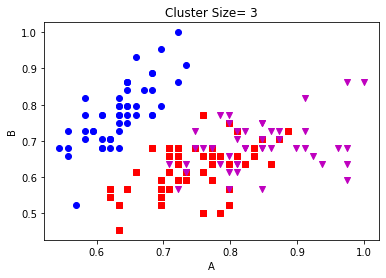

In [6]:
model3 = KMeans(3)
X = df.drop(["type"],axis=1).values
result3 = model3.cluster(X)

plt.figure()
i1 = np.argwhere(result3==0)
i2 = np.argwhere(result3==1)
i3 = np.argwhere(result3==2)

plt.scatter(A[i1],B[i1],c="b",marker = "o" )
plt.scatter(A[i2],B[i2],c="r",marker = "s" )
plt.scatter(A[i3],B[i3],c="m",marker = "v" )
plt.title("Cluster Size= " + str(3))
plt.xlabel(feat[0])
plt.ylabel(feat[1])
plt.show()

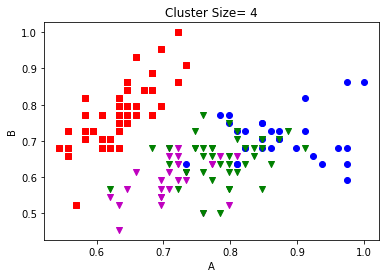

In [7]:
model4 = KMeans(4)
X = df.drop(["type"],axis=1).values
result4 = model4.cluster(X)

plt.figure()
i1 = np.argwhere(result4==0)
i2 = np.argwhere(result4==1)
i3 = np.argwhere(result4==2)
i4 = np.argwhere(result4==3)


plt.scatter(A[i1],B[i1],c="b",marker = "o" )
plt.scatter(A[i2],B[i2],c="r",marker = "s" )
plt.scatter(A[i3],B[i3],c="m",marker = "v" )
plt.scatter(A[i4],B[i4],c="g",marker = "v" )
plt.title("Cluster Size= " + str(4))
plt.xlabel(feat[0])
plt.ylabel(feat[1])
plt.show()


# Q1b) 

I have chosen A and B as two features two visualize because they have almost zero correlation coefficient so are more appropriate in  independently describing the data points.

To me cluster size 2 makes more sense.


In [8]:
def validate_kmeans(y_hat,y):
    """print accuracy of prediction for each class for the compounds dataset
    yhat: np.array shape(ndata). Your prediction of classes
    y: np.array of str shape(ndata). data labels / ground truths.
    """
    # correct classification
    compounds = ['amide','phenol','ether']#np.unique(y) # should be ['amide','phenol','ether'] for compounds dataset
    clusters =[np.where((y==c)) for c in compounds]
    pred_class = np.unique(y_hat)
    
    #remove -1 for noise point in DBSCAN
    pred_class= np.delete(pred_class,np.where(pred_class==-1))
    assert len(pred_class) == len(compounds), f'y_hat has less or more than {len(compounds)} classes:{pred_class}'

    for i in range(3):
        #loop over solutions
        counts=[]
        scores=[]
        for j in range(3):
            #loop over clusters of true assignments
            sol_i= np.where((y_hat==pred_class[i]))
            counts.append(len(np.intersect1d(sol_i, clusters[j])))
            scores.append(counts[-1]/len(clusters[j]))
        idx = np.argmax(scores)
        print(f'Class {pred_class[i]} - {compounds[idx]}: {counts[idx]} out \
of {np.count_nonzero(clusters[idx])} are classified correctly')

In [9]:
#Q1c)

model3 = KMeans(3)
X = df.drop(["type"],axis=1).values
result3 = model3.cluster(X)
print("len of yhat=" + str(len(result3)))
print("len of y=" + str(len(result3)))

validate_kmeans(result3,df["type"])

len of yhat=150
len of y=150
Class 0 - ether: 46 out of 50 are classified correctly
Class 1 - amide: 48 out of 49 are classified correctly
Class 2 - phenol: 50 out of 50 are classified correctly


# Q1c)

Classification seems to be pretty good, only 5 points seem to be misplaced

In [10]:
class KMeans_alt():
    
    def __init__(self, K, maximum_iters=100):
        # K: number of clusters to be created
        # distance matrix is Eucledian distance
        self.K = K
        self.maximum_iters = maximum_iters
    
    def cluster(self, input_points):
        """ Do KMeans clustering
        input_points: np.array shape(ndata,nfeatures). 
            Each feature is assumed to be normalized within range of [0,1]
        """
        centroids = np.random.random((self.K, input_points.shape[1]))
        assignments = np.zeros(input_points.shape[0])
        new_assignments = self.create_new_assignments(centroids, input_points)
        # restart if run into bad initialization
#         # Comment out this part for Q1.(d)
#         if len(np.unique(new_assignments))< self.K:
#             return self.cluster(input_points)
            
        n_iters = 1
        while (new_assignments != assignments).any() and n_iters < self.maximum_iters:
            ### Compute the centroid given new assignment ###
            for i in range(0,self.K):
                points = input_points[np.argwhere(new_assignments==i)]
                if len(points) !=0:# too avoid devision by error warnings
                    centroids[i] = np.mean(points, axis=0)
            assignments = new_assignments
            ### Update the assignment with current centroids ###
            #print(assignments)
            new_assignments = self.create_new_assignments(centroids, input_points)
            #print(new_assignments)
            print((new_assignments != assignments).any())
            if len(np.unique(new_assignments))< self.K:
                warnings.warn('At least one centroid vanishes')
            n_iters += 1
            if n_iters == self.maximum_iters:
                print("Warning: Maximum number of iterations reached!")
                
        return new_assignments
            
        
    def create_new_assignments(self, centroids, data_points):
        """ Assign each datapoint to its nearest centroid.
        centroid: 2d array of the current centroid for each cluster
        data_points: 2d arrays recording the features of each data point.
        """
        ###Compute the distances that stores the Eucledian distances between each datapoints and the centroid ###
        #shape (ndata,ncentroid)
        distances = np.zeros((data_points.shape[0],self.K))
        for j in range(0,self.K):
            for i in range(0,data_points.shape[0]):
                distances[i,j] = np.linalg.norm(data_points[i,:] - centroids[j])
        new_assignments = np.argmin(distances, axis=-1)
        return new_assignments
        

In [11]:
model4_alt = KMeans_alt(4)
X = df.drop(["type"],axis=1).values
result4_alt = model4_alt.cluster(X)
print(result4_alt)

True
False
[3 1 2 2 2 1 3 2 3 2 3 2 1 2 1 1 2 2 3 1 1 2 3 2 1 2 1 1 1 2 2 1 2 1 3 3 1
 2 3 1 3 3 2 2 1 3 2 2 2 2 1 3 2 2 2 3 2 3 2 1 1 3 1 3 2 1 3 1 3 3 1 1 3 2
 3 1 2 3 3 3 3 1 1 3 2 3 3 3 3 3 3 2 1 1 1 1 2 2 2 1 3 3 3 3 3 1 1 1 1 3 2
 1 1 3 3 2 1 1 1 2 1 1 1 3 2 2 2 3 2 1 2 3 2 3 2 2 1 3 1 3 2 1 3 1 3 1 2 3
 3 3]


/home/nikhil/miniconda3/envs/mlclass2/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: At least one centroid vanishes


Because of wrong initialization the code is not converging within a reasonable number of iterations.
Wrong Initialization might create one of the centroids at some weird corner which is far away from all data points. If that happens there will not be any data points inside that empty cluster and the centroid of that cluster will not update over time. Hence no point will ever get assigned to that cluster. This in turn will also affect updation of other centroids. This in turn can lead to clustering of the data into fewer groups then desired,

Methods to tackle these issues:
a) To have a check for bad initialization.
b) Reduce the cluster size to ensure there are less "weird points"



# Q2a) DBSCAN

In [12]:
from sklearn.cluster import DBSCAN
import pandas as pd
df=pd.read_csv("compounds.csv")
df.head()
X=df.drop(["type"],axis=1).values
for i in range(0,len(data[0,:])):
    df.iloc[:,i] = np.true_divide(df.iloc[:,i],np.max(df.iloc[:,i]))
df.head()

X = df.drop(["type"],axis=1).values

db = DBSCAN(eps=0.1, min_samples=3)
clustering = db.fit(X)
clustering.labels_

# Indices of core samples.
print("Number of Core Points")
print(len(clustering.core_sample_indices_))
print("Number of Noise Points")
print(len(np.argwhere(clustering.labels_==-1)))
print("Number of Border Points")
print(len(X) - len(clustering.core_sample_indices_) - len(np.argwhere(clustering.labels_==-1)))

Number of Core Points
134
Number of Noise Points
11
Number of Border Points
5


In [13]:
def validate(y_hat,y):
    """print accuracy of prediction for each class for the compounds dataset
    yhat: np.array shape(ndata). Your prediction of classes
    y: np.array of str shape(ndata). data labels / ground truths.
    """
    # correct classification
    compounds = np.unique(y) # should be ['amide','phenol','ether'] for compounds dataset
    clusters =[np.where((y==c)) for c in compounds]
    pred_class = np.unique(y_hat)
    
    #remove -1 for noise point in DBSCAN
    pred_class= np.delete(pred_class,np.where(pred_class==-1))
    assert len(pred_class) == len(compounds), f'y_hat has less or more than {len(compounds)} classes:{pred_class}'

    for i in range(3):
        #loop over solutions
        counts=[]
        scores=[]
        for j in range(3):
            #loop over clusters of true assignments
            sol_i= np.where((y_hat==pred_class[i]))
            counts.append(len(np.intersect1d(sol_i, clusters[j])))
            scores.append(counts[-1]/len(clusters[j]))
        idx = np.argmax(scores)
        print(f'Class {pred_class[i]} - {compounds[idx]}: {counts[idx]} out \
of {np.count_nonzero(clusters[idx])} are classified correctly')

        
validate(clustering.labels_,df["type"])

Class 0 - amide: 50 out of 49 are classified correctly
Class 1 - phenol: 49 out of 50 are classified correctly
Class 2 - ether: 4 out of 50 are classified correctly


Compared to Kmeans, DBscan seems very less effective in categorising into 3 classes. It performs very bad in identifying the ether class as such.

# Q2b

[1 0 0 ... 1 1 1]


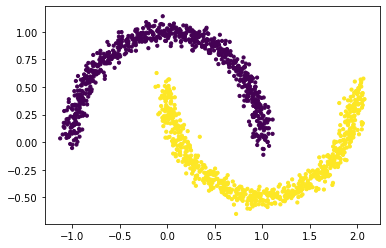

In [14]:
from sklearn import cluster, datasets, mixture
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice
from pylab import *

np.random.seed(0)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
# print(noisy_moons)
X,y=noisy_moons
print(y)
plt.scatter(X[:, 0], X[:, 1], s=10,c=y)

[0 1 0 ... 0 0 1]


Text(0.5, 1.0, 'Kmeans clustering')

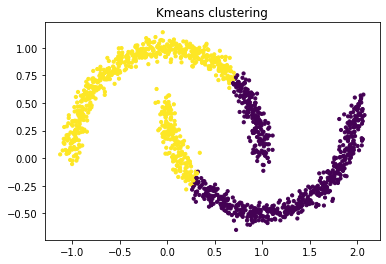

In [15]:
results_kmeans = model2.cluster(X)
print(results_kmeans)
plt.scatter(X[:, 0], X[:, 1], s=10,c=results_kmeans)
plt.title("Kmeans clustering")

Text(0.5, 1.0, 'DBSCAN clustering')

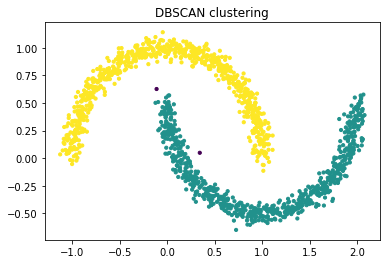

In [17]:
db_moon = DBSCAN(eps=0.1, min_samples = 3)
clusterin_moon= db_moon.fit(X)
resuts_db = clusterin_moon.labels_
plt.scatter(X[:, 0], X[:, 1], s=10,c=resuts_db)
plt.title("DBSCAN clustering")

In [19]:
print("Number of Noise Points")
print(len(np.argwhere(clusterin_moon.labels_==-1)))

Number of Noise Points
2


The clustering produced by DBSCAN is obviously more effective.